In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [16]:
df=pd.read_csv('zoo.csv')

In [17]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


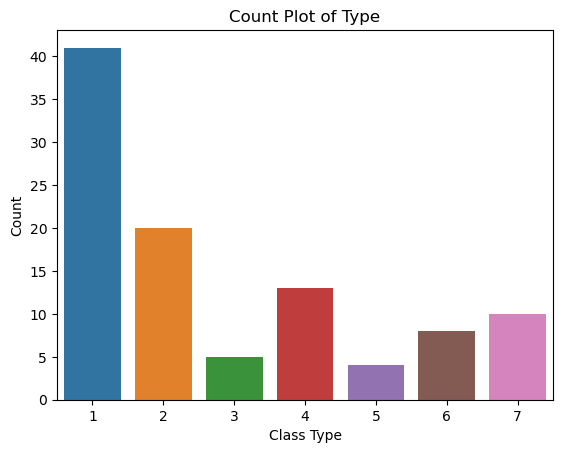

In [18]:
sns.countplot(x='type',data=df)
plt.title('Count Plot of Type')
plt.xlabel('Class Type')
plt.ylabel('Count')
plt.show()

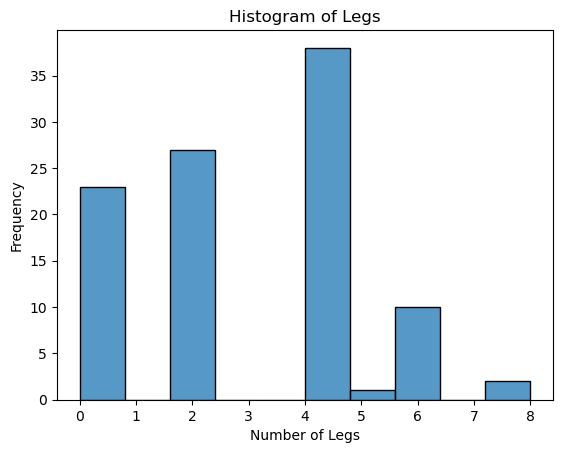

In [19]:
sns.histplot(df['legs'],bins=10)
plt.title('Histogram of Legs')
plt.xlabel('Number of Legs')
plt.ylabel('Frequency')
plt.show()

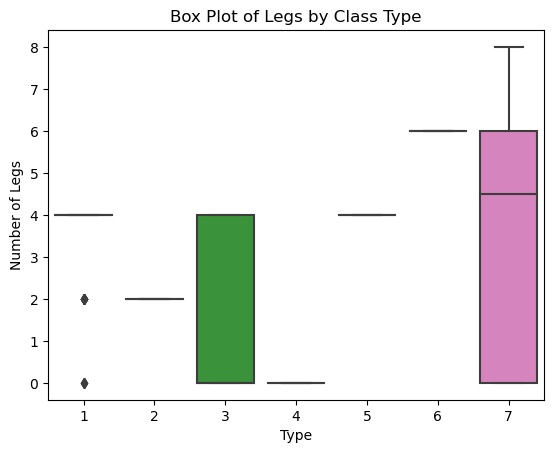

In [20]:
sns.boxplot(x='type',y='legs',data=df)
plt.title('Box Plot of Legs by Class Type')
plt.xlabel('Type')
plt.ylabel('Number of Legs')
plt.show()

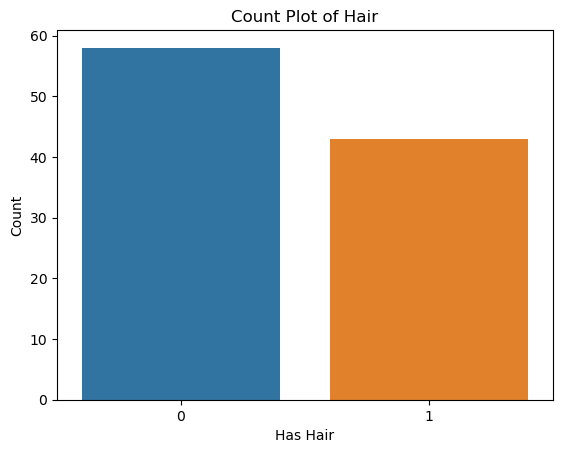

In [21]:
sns.countplot(x='hair',data=df)
plt.title('Count Plot of Hair')
plt.xlabel('Has Hair')
plt.ylabel('Count')
plt.show()

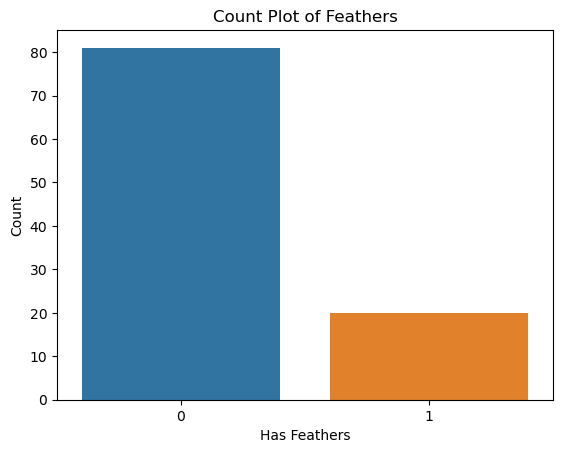

In [22]:
sns.countplot(x='feathers',data=df)
plt.title('Count Plot of Feathers')
plt.xlabel('Has Feathers')
plt.ylabel('Count')
plt.show()

In [23]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [24]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [25]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

In [26]:
x=df.drop(columns=['animal name','type'])
y=df['type']

In [27]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [28]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.75,random_state=100)

In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25, 16)
(25,)
(76, 16)
(76,)


In [31]:
imputer=SimpleImputer(strategy='mean')
imputer

SimpleImputer()

In [32]:
x_train_imputed=imputer.fit_transform(x_train)
x_train_imputed

array([[0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 4., 1., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 4., 1., 1., 1.],
       [1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 4., 1., 0., 1.],
       [1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 2., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 4., 0., 1., 0.],
       [0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 2., 1., 0., 0.],
       [0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 2., 1., 0., 1.],
       [0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 6., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,

In [33]:
x_test_imputed=imputer.transform(x_test)
x_test_imputed

array([[0., 1., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 0.]])

In [34]:
scaler=StandardScaler()
scaler

StandardScaler()

In [35]:
x_train_scaled=scaler.fit_transform(x_train_imputed)
x_train_scaled

array([[-0.68599434, -0.43643578,  0.75      , -0.75      , -0.43643578,
        -1.040833  ,  0.68599434,  0.81649658,  0.56195149,  0.68599434,
         0.        , -0.5       , -1.17707102,  0.62360956, -0.29488391,
        -0.88640526],
       [-0.68599434, -0.43643578,  0.75      , -0.75      , -0.43643578,
        -1.040833  ,  0.68599434, -1.22474487, -1.77951304, -1.45773797,
         0.        , -0.5       , -1.17707102, -1.60356745, -0.29488391,
        -0.88640526],
       [ 1.45773797, -0.43643578, -1.33333333,  1.33333333, -0.43643578,
        -1.040833  , -1.45773797,  0.81649658,  0.56195149,  0.68599434,
         0.        , -0.5       ,  0.60636992,  0.62360956, -0.29488391,
         1.12815215],
       [ 1.45773797, -0.43643578, -1.33333333,  1.33333333, -0.43643578,
        -1.040833  , -1.45773797,  0.81649658,  0.56195149,  0.68599434,
         0.        , -0.5       ,  0.60636992,  0.62360956,  3.39116499,
         1.12815215],
       [ 1.45773797, -0.43643578, -1

In [36]:
x_test_scaled=scaler.fit_transform(x_test_imputed)
x_test_scaled

array([[-0.92393644,  1.93649167,  0.87603759, ...,  0.57735027,
        -0.41137668, -0.87603759],
       [-0.92393644, -0.51639778,  0.87603759, ...,  0.57735027,
        -0.41137668,  1.14150353],
       [-0.92393644, -0.51639778,  0.87603759, ..., -1.73205081,
        -0.41137668, -0.87603759],
       ...,
       [-0.92393644, -0.51639778,  0.87603759, ...,  0.57735027,
         2.43086217, -0.87603759],
       [ 1.08232554, -0.51639778, -1.14150353, ...,  0.57735027,
        -0.41137668,  1.14150353],
       [-0.92393644,  1.93649167,  0.87603759, ...,  0.57735027,
        -0.41137668, -0.87603759]])

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [38]:
knn=KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

In [39]:
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [40]:
y_pred=knn.predict(x_test_scaled)
y_pred

array([2, 4, 7, 1, 1, 7, 1, 2, 2, 2, 1, 7, 1, 4, 7, 1, 4, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 2, 2, 7, 2, 1, 1, 1, 4, 1, 1, 1, 1, 4, 4, 7, 4, 1, 7,
       7, 7, 2, 1, 1, 7, 1, 4, 1, 4, 1, 7, 2, 2, 7, 7, 7, 2, 7, 4, 1, 4,
       4, 1, 2, 4, 1, 1, 1, 4, 1, 2], dtype=int64)

In [41]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7894736842105263

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid={'n_neighbors':[1,3,5,7,9]}
param_grid

{'n_neighbors': [1, 3, 5, 7, 9]}

In [44]:
grid_search=GridSearchCV(KNeighborsClassifier(),param_grid, cv=5,scoring='accuracy')
grid_search

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]}, scoring='accuracy')

In [45]:
grid_search.fit(x_train_scaled,y_train)

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]}, scoring='accuracy')

In [46]:
best_k=grid_search.best_params_['n_neighbors']
best_k

5

In [47]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [48]:
precision=precision_score(y_test,y_pred,average='weighted')
precision

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7172526905499041

In [49]:
recall=recall_score(y_test,y_pred,average='weighted')
recall

0.7894736842105263

In [50]:
f1=f1_score(y_test,y_pred,average='weighted')
f1

0.7371891014671704

In [51]:
from sklearn.decomposition import PCA

In [52]:
pca=PCA(n_components=2)
pca

PCA(n_components=2)

In [53]:
x_train_pca=pca.fit_transform(x_train_scaled)

In [54]:
knn.fit(x_train_pca,y_train)

KNeighborsClassifier()

In [55]:
x_min,x_max=x_train_pca[:,0].min()-1,x_train_pca[:,0].max()+1

In [56]:
x_min,x_max

(-3.8748796452910255, 4.993463387701024)

In [57]:
y_min,y_max=x_train_pca[:,1].min()-1,x_train_pca[:,1].max()+1

In [58]:
y_min,y_max

(-3.756244589605625, 4.236468059854199)

In [59]:
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))

In [60]:
xx,yy

(array([[-3.87487965, -3.77487965, -3.67487965, ...,  4.72512035,
          4.82512035,  4.92512035],
        [-3.87487965, -3.77487965, -3.67487965, ...,  4.72512035,
          4.82512035,  4.92512035],
        [-3.87487965, -3.77487965, -3.67487965, ...,  4.72512035,
          4.82512035,  4.92512035],
        ...,
        [-3.87487965, -3.77487965, -3.67487965, ...,  4.72512035,
          4.82512035,  4.92512035],
        [-3.87487965, -3.77487965, -3.67487965, ...,  4.72512035,
          4.82512035,  4.92512035],
        [-3.87487965, -3.77487965, -3.67487965, ...,  4.72512035,
          4.82512035,  4.92512035]]),
 array([[-3.75624459, -3.75624459, -3.75624459, ..., -3.75624459,
         -3.75624459, -3.75624459],
        [-3.65624459, -3.65624459, -3.65624459, ..., -3.65624459,
         -3.65624459, -3.65624459],
        [-3.55624459, -3.55624459, -3.55624459, ..., -3.55624459,
         -3.55624459, -3.55624459],
        ...,
        [ 3.94375541,  3.94375541,  3.94375541, ...,  

In [61]:
z=knn.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)

In [62]:
z

array([[4, 4, 4, ..., 1, 1, 1],
       [4, 4, 4, ..., 1, 1, 1],
       [4, 4, 4, ..., 1, 1, 1],
       ...,
       [7, 7, 7, ..., 1, 1, 1],
       [7, 7, 7, ..., 1, 1, 1],
       [7, 7, 7, ..., 1, 1, 1]], dtype=int64)

Text(0.5, 0, 'Principal Component Analysis')

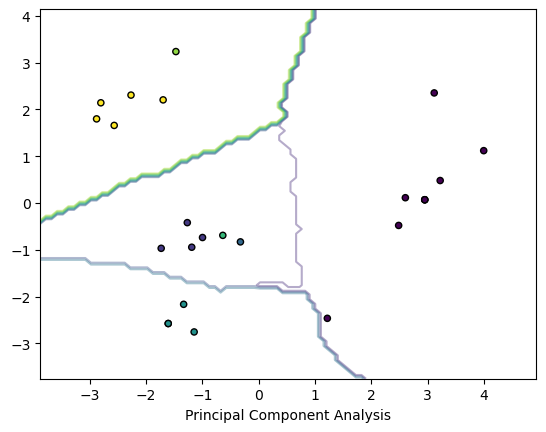

In [67]:
plt.contour(xx,yy,z,alpha=0.4)
plt.scatter(x_train_pca[:, 0],
x_train_pca[:, 1],c=y_train,s=20,edgecolor='k')
plt.xlabel('Principal Component Analysis')